In [47]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from utils import get_dataframe
from tueplots import bundles
from tueplots.constants.color import rgb
from plot_config import config

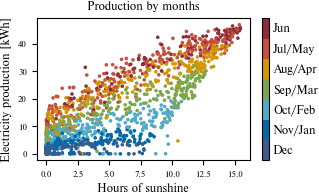

In [48]:
df = get_dataframe(interpolate_data=True)
n_days = len(df)
continuous = False

color_gradient = []

if continuous:
    for k in range(n_days):
        if k > 365 + 59: # adjusts count to gap year
            k -= 1
        if k % 365 < np.ceil(365/2):
            color_gradient.append(k % 365)
        else:
            color_gradient.append(365 - (k % 365))
else:
    for k in range(n_days):
        color_gradient.append(6 - np.abs(int(df["Datum und Uhrzeit"][k][3:5])-6))
        
# Tests gap year calc
assert(color_gradient[0* 365 + 20] == color_gradient[1* 365 + 20] == color_gradient[2* 365 + 21])
assert(df["Datum und Uhrzeit"][0* 365 + 20][:5] == df["Datum und Uhrzeit"][1* 365 + 20][:5] == df["Datum und Uhrzeit"][2* 365 + 21][:5])


# Plotting:

# set plotting stylesheet
plt.rcParams.update(bundles.icml2022(column='half', nrows=1, ncols=1, usetex=False))

cmap= ListedColormap([rgb.tue_darkblue, rgb.tue_blue, rgb.tue_lightblue, rgb.tue_green, rgb.tue_orange, rgb.tue_ocre , rgb.tue_red])

fig, ax = plt.subplots()


sc = plt.scatter(df["SDK"], df["Gesamtanlage[kWh]"], c=color_gradient, cmap=cmap, marker='.', s=config.plotting_params.dot_size)

cbar = plt.colorbar(sc)
cbar.ax.get_yaxis().set_ticks([])

for j, month in enumerate(['Dec','Nov/Jan','Oct/Feb','Sep/Mar','Aug/Apr','Jul/May','Jun']):
    #cbar.ax.text(1.5, j * color_gradient[30], month, ha='left', va='center')
    cbar.ax.text(1.5, 6/7*(j + .5), month, ha='left', va='center')

plt.xlabel(config.labels.sunshine_label)
plt.ylabel(config.labels.production)
plt.title('Production by months')

plt.savefig("../report/fig/scatter.pdf")
plt.show()